# Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# tamaño de los gráficos de matplotlib.pyplot: ancho x alto
plt.rcParams["figure.figsize"] = (10, 5)

from google.colab import drive
drive.mount('/content/drive')

# import sys
# sys.path.append('/content/drive/MyDrive/tt1_2023cuat1/')

Mounted at /content/drive


# Levantar datos y preprocesamiento

In [ ]:
# Miro uno para ver qué columnas tiene


path = '/content/drive/MyDrive/tt1_2023cuat1/'
filename = 'prod_2022.csv'

raw = pd.read_csv(path+filename, usecols = [1,2,4,5,6,7,8,9,10] )

#Detalle mensual de producción por pozo, yacimiento, concesión y provincia. Petróleo [m3], gas en [Miles de m3] y agua en [m3]

In [ ]:
raw.head()
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971882 entries, 0 to 971881
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   anio       971882 non-null  int64  
 1   mes        971882 non-null  int64  
 2   prod_pet   971882 non-null  float64
 3   prod_gas   971882 non-null  float64
 4   prod_agua  971882 non-null  float64
 5   iny_agua   971882 non-null  float64
 6   iny_gas    971882 non-null  float64
 7   iny_co2    971882 non-null  float64
 8   iny_otro   971882 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 66.7 MB


## Agrupar por producción total de pet, gas, agua

In [2]:
path = '/content/drive/MyDrive/tt1_2023cuat1/'

filenames = []
for i in range(6,10,1):
  filenames.append('prod_200'+str(i)+'.csv')
for i in range(10,24,1):
# for i in range(18,24,1):
  filenames.append('prod_20'+str(i)+'.csv')

# filenames = ['prod_2022.csv', 'prod_2021.csv']
print(filenames)

data = pd.DataFrame()

for name in filenames:
  raw = pd.read_csv(path+name, usecols = [1,2,4,5,6,7,8,9,10] )
  raw_filter = raw.groupby(['anio','mes']).sum().reset_index()
  # data = data.append(raw_filter)
  data = pd.concat([data,raw_filter])



#Detalle mensual de producción por pozo, yacimiento, concesión y provincia. Petróleo [m3], gas en [Miles de m3] y agua en [m3]

['prod_2006.csv', 'prod_2007.csv', 'prod_2008.csv', 'prod_2009.csv', 'prod_2010.csv', 'prod_2011.csv', 'prod_2012.csv', 'prod_2013.csv', 'prod_2014.csv', 'prod_2015.csv', 'prod_2016.csv', 'prod_2017.csv', 'prod_2018.csv', 'prod_2019.csv', 'prod_2020.csv', 'prod_2021.csv', 'prod_2022.csv', 'prod_2023.csv']


In [ ]:
data.head()
# data.iloc[0]
# data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 2
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   anio       207 non-null    int64  
 1   mes        207 non-null    int64  
 2   prod_pet   207 non-null    float64
 3   prod_gas   207 non-null    float64
 4   prod_agua  207 non-null    float64
 5   iny_agua   207 non-null    float64
 6   iny_gas    207 non-null    float64
 7   iny_co2    207 non-null    float64
 8   iny_otro   207 non-null    float64
 9   mes2       207 non-null    object 
 10  anio_mes   207 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 19.4+ KB


In [3]:
# Creo que una col nueva para poder ordenar temporalmente

def f(row):
    if row['mes'] <= 9:
        val = '0' + str(int(row['mes']))
    else:
        val = str(int(row['mes']))
    return val

data['mes2'] = data.apply(f, axis=1)
data['anio_mes'] = data['anio'].astype(str) +'_'+ data['mes2']
data.head()

,anio,mes,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,mes2,anio_mes
0,2006,1,3.019657e+06,4.229240e+06,2.702052e+07,2.619298e+07,138020.686,0.0,261356.655,01,2006_01
1,2006,2,2.756376e+06,3.913342e+06,2.631883e+07,2.544488e+07,90183.200,0.0,229484.955,02,2006_02
2,2006,3,3.188158e+06,4.292752e+06,2.781513e+07,2.883204e+07,94655.620,0.0,228519.842,03,2006_03
3,2006,4,3.096797e+06,4.198656e+06,2.688490e+07,2.818033e+07,67382.310,0.0,235736.611,04,2006_04
4,2006,5,3.247901e+06,4.454243e+06,2.852057e+07,2.870117e+07,49882.040,0.0,276653.704,05,2006_05


In [ ]:
print(data.shape)

(207, 11)


In [5]:
# ordeno por la col nueva y grafico
data = data.sort_values(['anio_mes'])

<Axes: xlabel='anio_mes'>

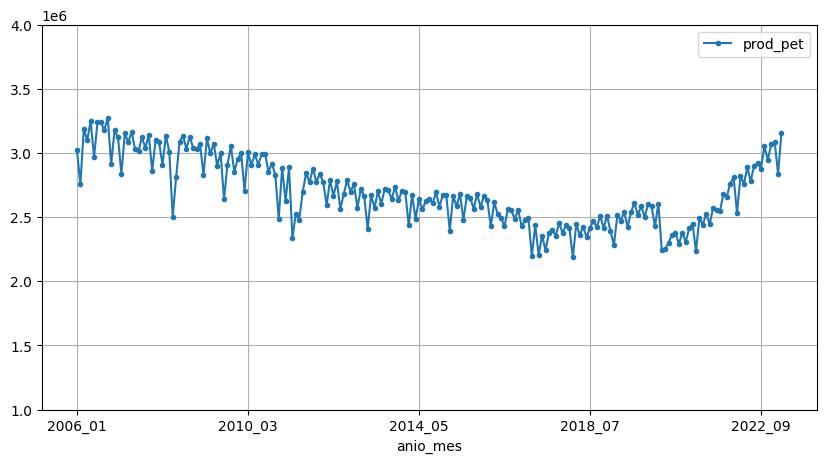

In [6]:
data.plot(x='anio_mes', y=['prod_pet'], style='.-', grid=True, ylim=(10**6,4*10**6))

<Axes: xlabel='anio_mes'>

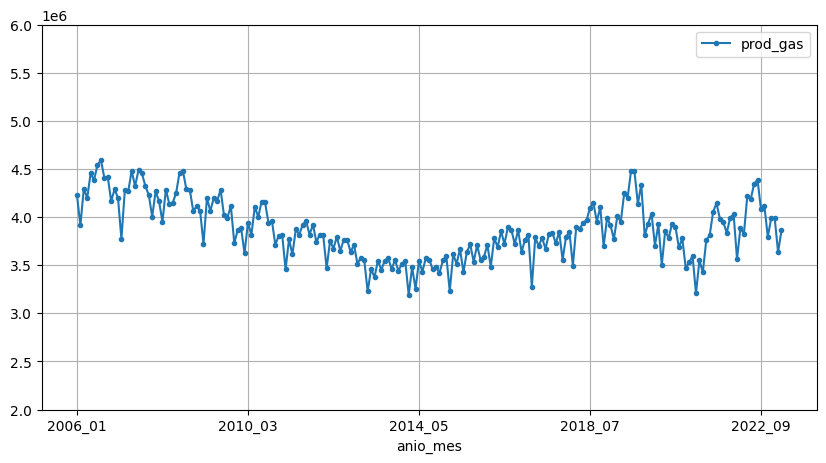

In [ ]:
data.plot(x='anio_mes', y=['prod_gas'], style='.-', grid=True, ylim=(2*10**6,6*10**6))

# Procesos gaussianos

- https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html
- https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy.html
- https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html

## Ejemplos didácticos

(-3.0, 3.0)

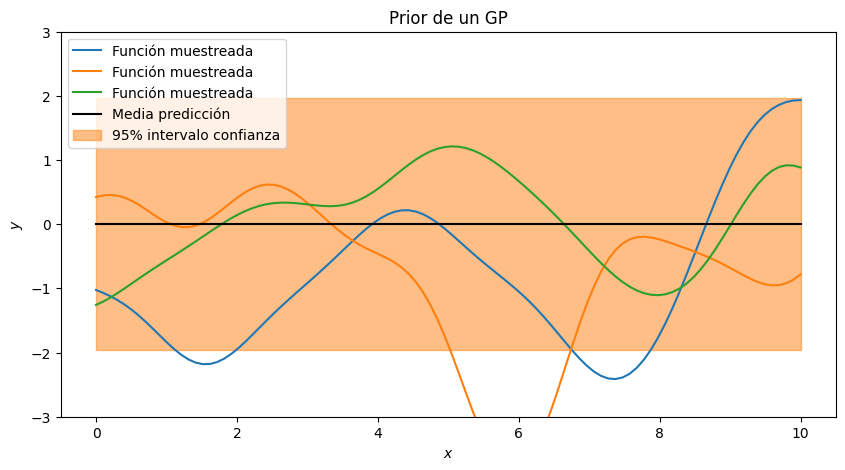

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


# datos para entrenar y predecir
X = np.linspace(start=0, stop=10, num=100).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

# datos para entrenar = observaciones
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)


# predicción sin entrenar: prior
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

y_sample = gaussian_process.sample_y(X,3)
plt.plot(X,y_sample, label="Función muestreada")

plt.plot(X, mean_prediction, label="Media predicción", color='black')

plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color="tab:orange",
    alpha=0.5,
    label=r"95% intervalo confianza",
)

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Prior de un GP")
plt.legend()
plt.ylim(-3,3)

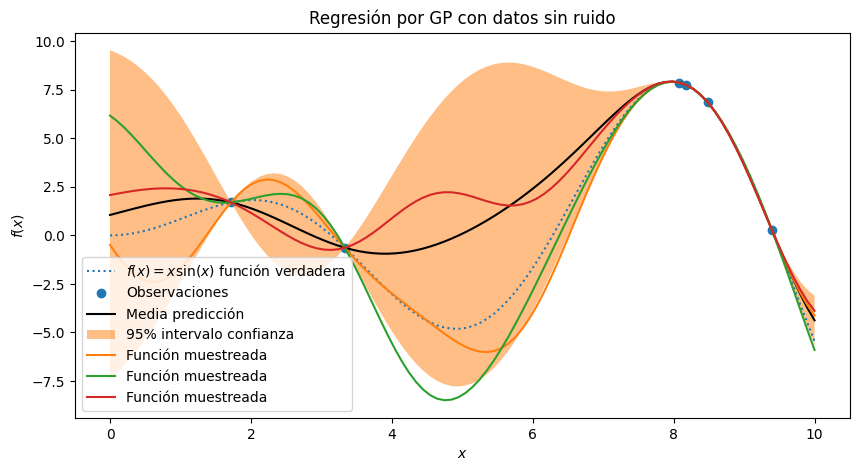

In [ ]:
# gaussian_process = GaussianProcessRegressor(
#     kernel=kernel, alpha=1.5**2, n_restarts_optimizer=9
# )
gaussian_process.fit(X_train, y_train)

mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$ función verdadera", linestyle="dotted")

plt.scatter(X_train, y_train, label="Observaciones")

plt.plot(X, mean_prediction, label="Media predicción", color='black')
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% intervalo confianza",
)

y_sample = gaussian_process.sample_y(X,3)
plt.plot(X,y_sample, label="Función muestreada")

plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Regresión por GP con datos sin ruido")

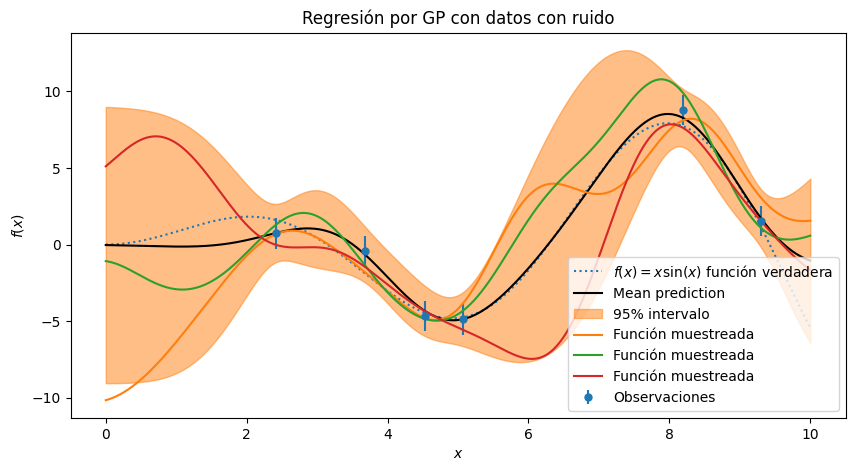

In [ ]:
noise_std = 1
y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)

gaussian_process = GaussianProcessRegressor(
    kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9)

gaussian_process.fit(X_train, y_train_noisy)
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$ función verdadera", linestyle="dotted")

plt.errorbar(
    X_train,
    y_train_noisy,
    noise_std,
    linestyle="None",
    color="tab:blue",
    marker=".",
    markersize=10,
    label="Observaciones",
)

plt.plot(X, mean_prediction, label="Media predicción", color='black')

plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color="tab:orange",
    alpha=0.5,
    label=r"95% intervalo",
)

y_sample = gaussian_process.sample_y(X,3)
plt.plot(X,y_sample, label="Función muestreada")

plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Regresión por GP con datos con ruido")

## Aplicación

In [297]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import Matern

data.head()

,anio,mes,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,mes2,anio_mes
0,2006,1,3.019657e+06,4.229240e+06,2.702052e+07,2.619298e+07,138020.686,0.0,261356.655,01,2006_01
1,2006,2,2.756376e+06,3.913342e+06,2.631883e+07,2.544488e+07,90183.200,0.0,229484.955,02,2006_02
2,2006,3,3.188158e+06,4.292752e+06,2.781513e+07,2.883204e+07,94655.620,0.0,228519.842,03,2006_03
3,2006,4,3.096797e+06,4.198656e+06,2.688490e+07,2.818033e+07,67382.310,0.0,235736.611,04,2006_04
4,2006,5,3.247901e+06,4.454243e+06,2.852057e+07,2.870117e+07,49882.040,0.0,276653.704,05,2006_05


In [163]:
data_np = data.to_numpy()
# print(data_np)


# prod_pet = prod_pet - np.mean(prod_pet)
# plt.plot(prod_pet)
# prod_pet_trial = prod_pet[:31]
# # print(prod_pet_trial)
# print(prod_pet_trial.shape)
# meses_trial = np.arange(1,32,1)
# print(meses_trial.shape)

(207,)
(206,)
261902.5929233461
(207,)
1.0


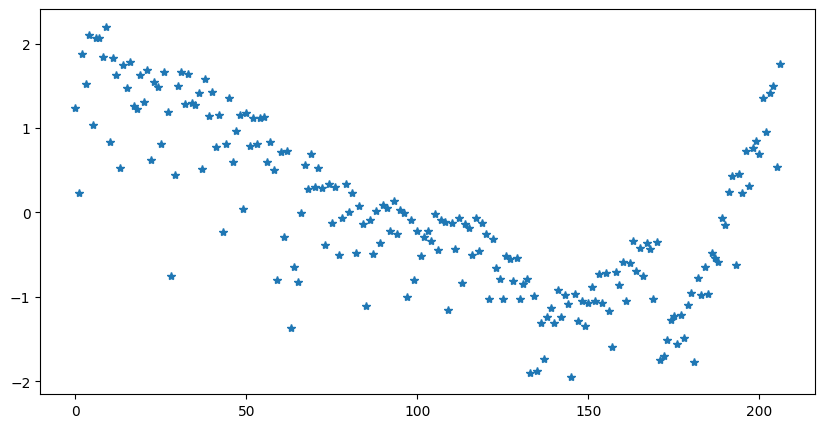

In [298]:
prod_pet = data_np[:,2]
# print(prod_pet)
print(prod_pet.shape)



cant_train = 206
cant_test = cant_train + 1

x_train = np.arange(0, cant_train, 1)
print(x_train.shape)

y_train = prod_pet[0:cant_train]

y_train_mean = np.mean(y_train)
y_train_std = np.std(y_train)

# print(np.mean(y_train))
print(y_train_std)

y_train = (y_train - y_train_mean)/y_train_std
# print(y_train)

y_test = prod_pet[0:cant_test]
y_test = (y_test - y_train_mean)/y_train_std
# print(y_test)
print(y_test.shape)

plt.plot(y_test,"*")

print(np.std(y_train))

In [299]:
noise_std = 0.05

# y_train = y_train/(10**6)
# print(np.mean(y_train))
# y_train = y_train - np.mean(y_train)

# plt.plot(y_train)
# rng = np.random.RandomState(1)
# y_train = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)

In [306]:
# kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-10, 1e10))
kernel = 1 * Matern(length_scale=1.0, length_scale_bounds=(1e-10, 1e10), nu=1.5)
gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=noise_std, n_restarts_optimizer=9)
# gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
# gaussian_process = GaussianProcessRegressor(alpha=noise_std**2, n_restarts_optimizer=9)

gaussian_process.fit(x_train.reshape(-1, 1), y_train)
# gaussian_process.kernel

GaussianProcessRegressor(alpha=0.05,
                         kernel=1**2 * Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=9)

In [301]:
# X = np.arange(1,31,0.2).reshape(-1, 1)
paso = 0.2
x_test = np.arange(0,cant_train+paso,0.2)
# print(x_test)
mean_prediction, std_prediction = gaussian_process.predict(x_test.reshape(-1, 1), return_std=True)

# print(mean_prediction)
# print(std_prediction)

(190.0, 208.0)

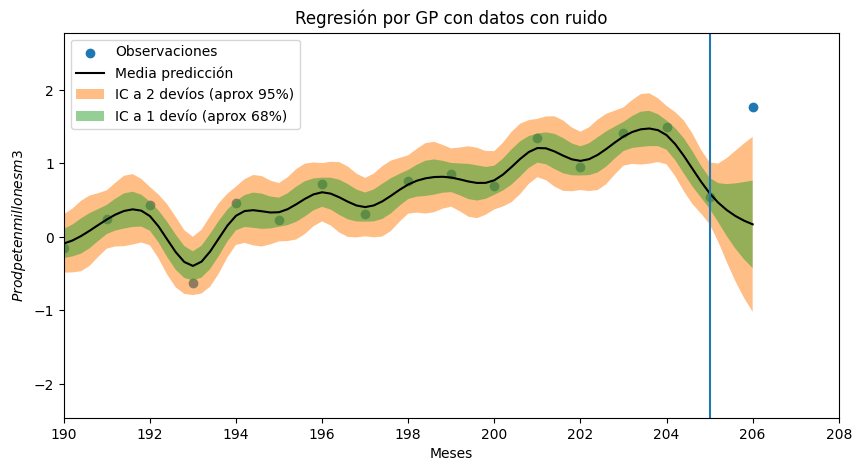

In [302]:

# plt.scatter(x_train, y_train, label="Observaciones")
plt.scatter(np.arange(0, cant_test, 1), y_test, label="Observaciones")

plt.plot(x_test, mean_prediction, label="Media predicción", color='black')

plt.axvline(x=x_train[-1])

# plt.fill_between(
#     x_test.ravel(),
#     mean_prediction - 1.96 * std_prediction,
#     mean_prediction + 1.96 * std_prediction,
#     alpha=0.5,
#     label=r"95% intervalo confianza",
# )

plt.fill_between(
    x_test.ravel(),
    mean_prediction - 2 * std_prediction,
    mean_prediction + 2 * std_prediction,
    alpha=0.5,
    label=r"IC a 2 devíos (aprox 95%)",
)

plt.fill_between(
    x_test.ravel(),
    mean_prediction - std_prediction,
    mean_prediction + std_prediction,
    alpha=0.5,
    label=r"IC a 1 devío (aprox 68%)",
)

# # plt.legend()
# # plt.xlabel("$x$")
# # plt.ylabel("$f(x)$")
# # _ = plt.title("Regresión por GP con datos sin ruido")

# # plt.plot(X, y, label=r"$f(x) = x \sin(x)$ función verdadera", linestyle="dotted")

# plt.errorbar(
#     X_train,
#     y_train,
#     noise_std,
#     linestyle="None",
#     color="tab:blue",
#     marker=".",
#     markersize=10,
#     label="Observaciones",
# )

# # plt.plot(X, mean_prediction, label="Media predicción", color='black')

# # plt.fill_between(
# #     X.ravel(),
# #     mean_prediction - 1.96 * std_prediction,
# #     mean_prediction + 1.96 * std_prediction,
# #     color="tab:orange",
# #     alpha=0.5,
# #     label=r"95% intervalo",
# # )

# # y_sample = gaussian_process.sample_y(X,3)
# # plt.plot(X,y_sample, label="Función muestreada")

plt.legend()
plt.xlabel("Meses")
plt.ylabel("$Prod pet en millones m3$")
plt.title("Regresión por GP con datos con ruido")
plt.xlim(190,208)